In [18]:
# mainSim code
# thalamic model
# AUG 9 2021

In [1]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import brian2

import pickle
import copy

import seaborn as sns


In [2]:
# load helper functions
from helper import generate_pref, plot_pref
import modelHelper

# load model class
from circuitModel import model

In [3]:
# load arealist
area_list = list(np.loadtxt('results/area_list.csv', delimiter=',', dtype='str'))
thal_list = list(np.loadtxt('results/thal_list.csv', delimiter=',', dtype='str'))
# load connectivity 
conn_cxcx = np.loadtxt('results/conn_cxcx.csv', delimiter=',')
conn_cxth = np.loadtxt('results/conn_cxth.csv', delimiter=',')
conn_thcx = np.loadtxt('results/conn_thcx.csv', delimiter=',')

# load interneuron density
normPVgrad_df = pd.read_csv('results/dfPV.csv', header = 0, index_col=0)
normSSTgrad_df = pd.read_csv('results/dfSST.csv', header = 0, index_col=0)

# load hierarchy
hierarchy_df = pd.read_csv('results/dfHier.csv', header=0, index_col=0)
hierarchy = np.array(hierarchy_df['hierarchy index'])

# load thalamus hierarchy
thal_hierarchy_df = pd.read_csv('results/dfThHier.csv', header=0, index_col=0)
thal_hierarchy = np.array(thal_hierarchy_df['THhier'])

In [4]:
# define divisions from Harris et al.
div = {'somatomotor':['SSp-bfd','SSp-tr','SSp-ll','SSp-ul',
                     'SSp-un','SSp-n','SSp-m','SSs','MOp','MOs'],
      'visual':['VISal','VISl','VISp','VISpl',
                'VISli','VISpor','VISrl'],
      'medial':['VISa','VISam','VISpm','RSPagl',
               'RSPd','RSPv'],
      'prefrontal':['FRP','ACAd','ACAv','PL',
                   'ILA','ORBl','ORBm','ORBvl'],
      'lateral':['AId','AIv','AIp','VISC',
                 'GU','TEa','PERI','ECT'],
      'auditory':['AUDd','AUDp','AUDpo','AUDv']}

div_color_list = np.array([[255, 140, 0],
                           [169, 164, 217],
                           [22, 37, 128],
                           [220,20,60],
                           [218,165,32],
                           [91,  0,  105]])/255
div_name_list = ['somatomotor',
                 'visual',
                 'medial',
                 'prefrontal',
                 'lateral',
                 'auditory']

In [5]:
with open('results/allparsThal.pkl', 'rb') as f:
    [parameters, conn_cxcx, pref_matrix,
         hierarchy_df, normPVgrad_df, normSSTgrad_df,
         area_list, conn_thcx, conn_cxth, thal_list] = pickle.load(f)

In [6]:
# parameters['g_cx_th'] = 0.32 * brian2.nA   # 0.15 # 0.15*brian2.nA  # 0.18*brian2.nA         # 0.1      * brian2.nA
parameters['g_cx_th'] = 0.0 * brian2.nA   # 0.15 # 0.15*brian2.nA  # 0.18*brian2.nA         # 0.1      * brian2.nA

# # thalamic input to cortex = th_cx    mm22
# parameters['g_th_cx_E_mean'] = 0.70 * brian2.nA  # 0.8  #1.1  #1.85
# # thalamic input to cortex = th_cx    mm33
# parameters['g_th_cx_I_mean'] = parameters['g_th_cx_E_mean'] * 2.3

######
thcxmodel = True
model_V1_thal_noThal = model(parameters, False, conn_cxcx, pref_matrix, hierarchy_df, normPVgrad_df, normSSTgrad_df, area_list, thcxmodel, conn_thcx, conn_cxth, thal_list)    
if thcxmodel:
    model_V1_thal_noThal.add_input(parameters['stim_strength'], ['VISp'], parameters['stim_on'], parameters['stim_off'], 'E1')
    # model_V1_thal_noThal.add_input(10*parameters['stim_strength'],['MOs'], parameters['stim_on'] + parameters['stim_off'], parameters['trial_length'], 'I')

model_V1_thal_noThal.run_sim(vocal_prompt = False)
[persistentactlist, baselineactlist, LRtoElist, LRtoIlist] = model_V1_thal_noThal.save_delay_activity('tempdata/', False)
if model_V1_thal_noThal.thcxmodel == True:
    th_persistentactlist = model_V1_thal_noThal.save_th_delay_activity('tempdata/',False)


VISp
simulation start: 
sim done.


1.10E-14
4.38E-08


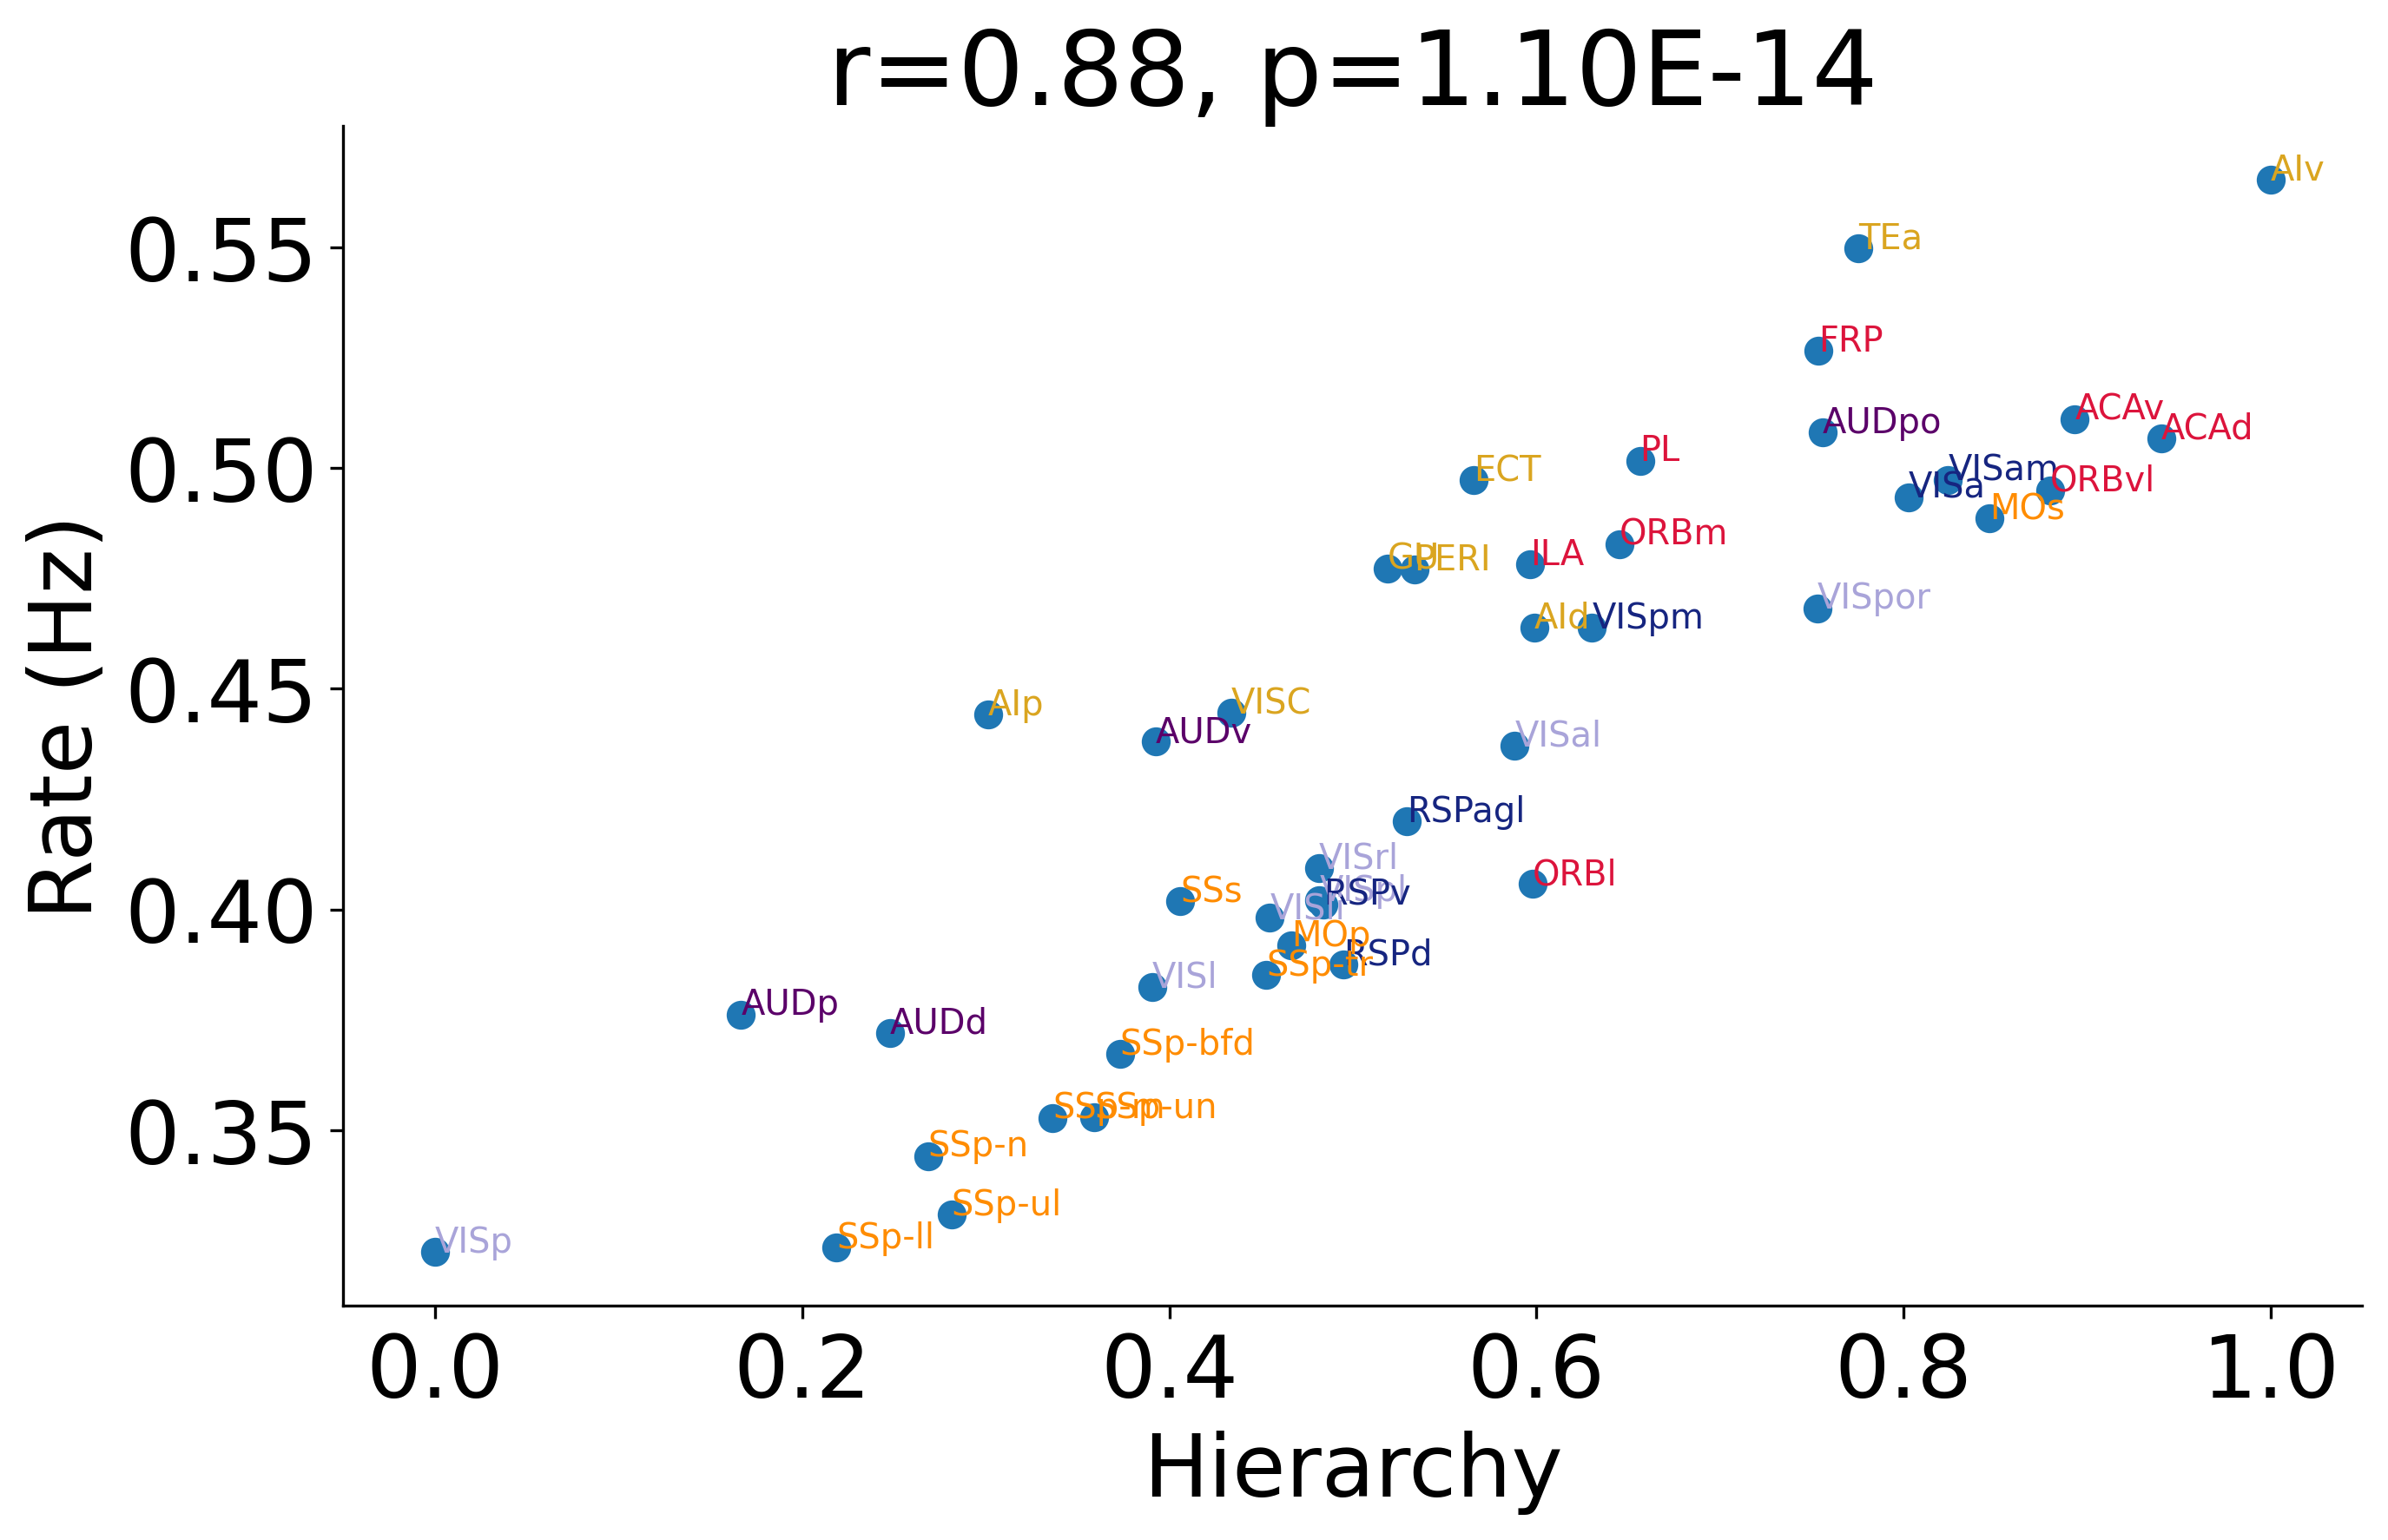

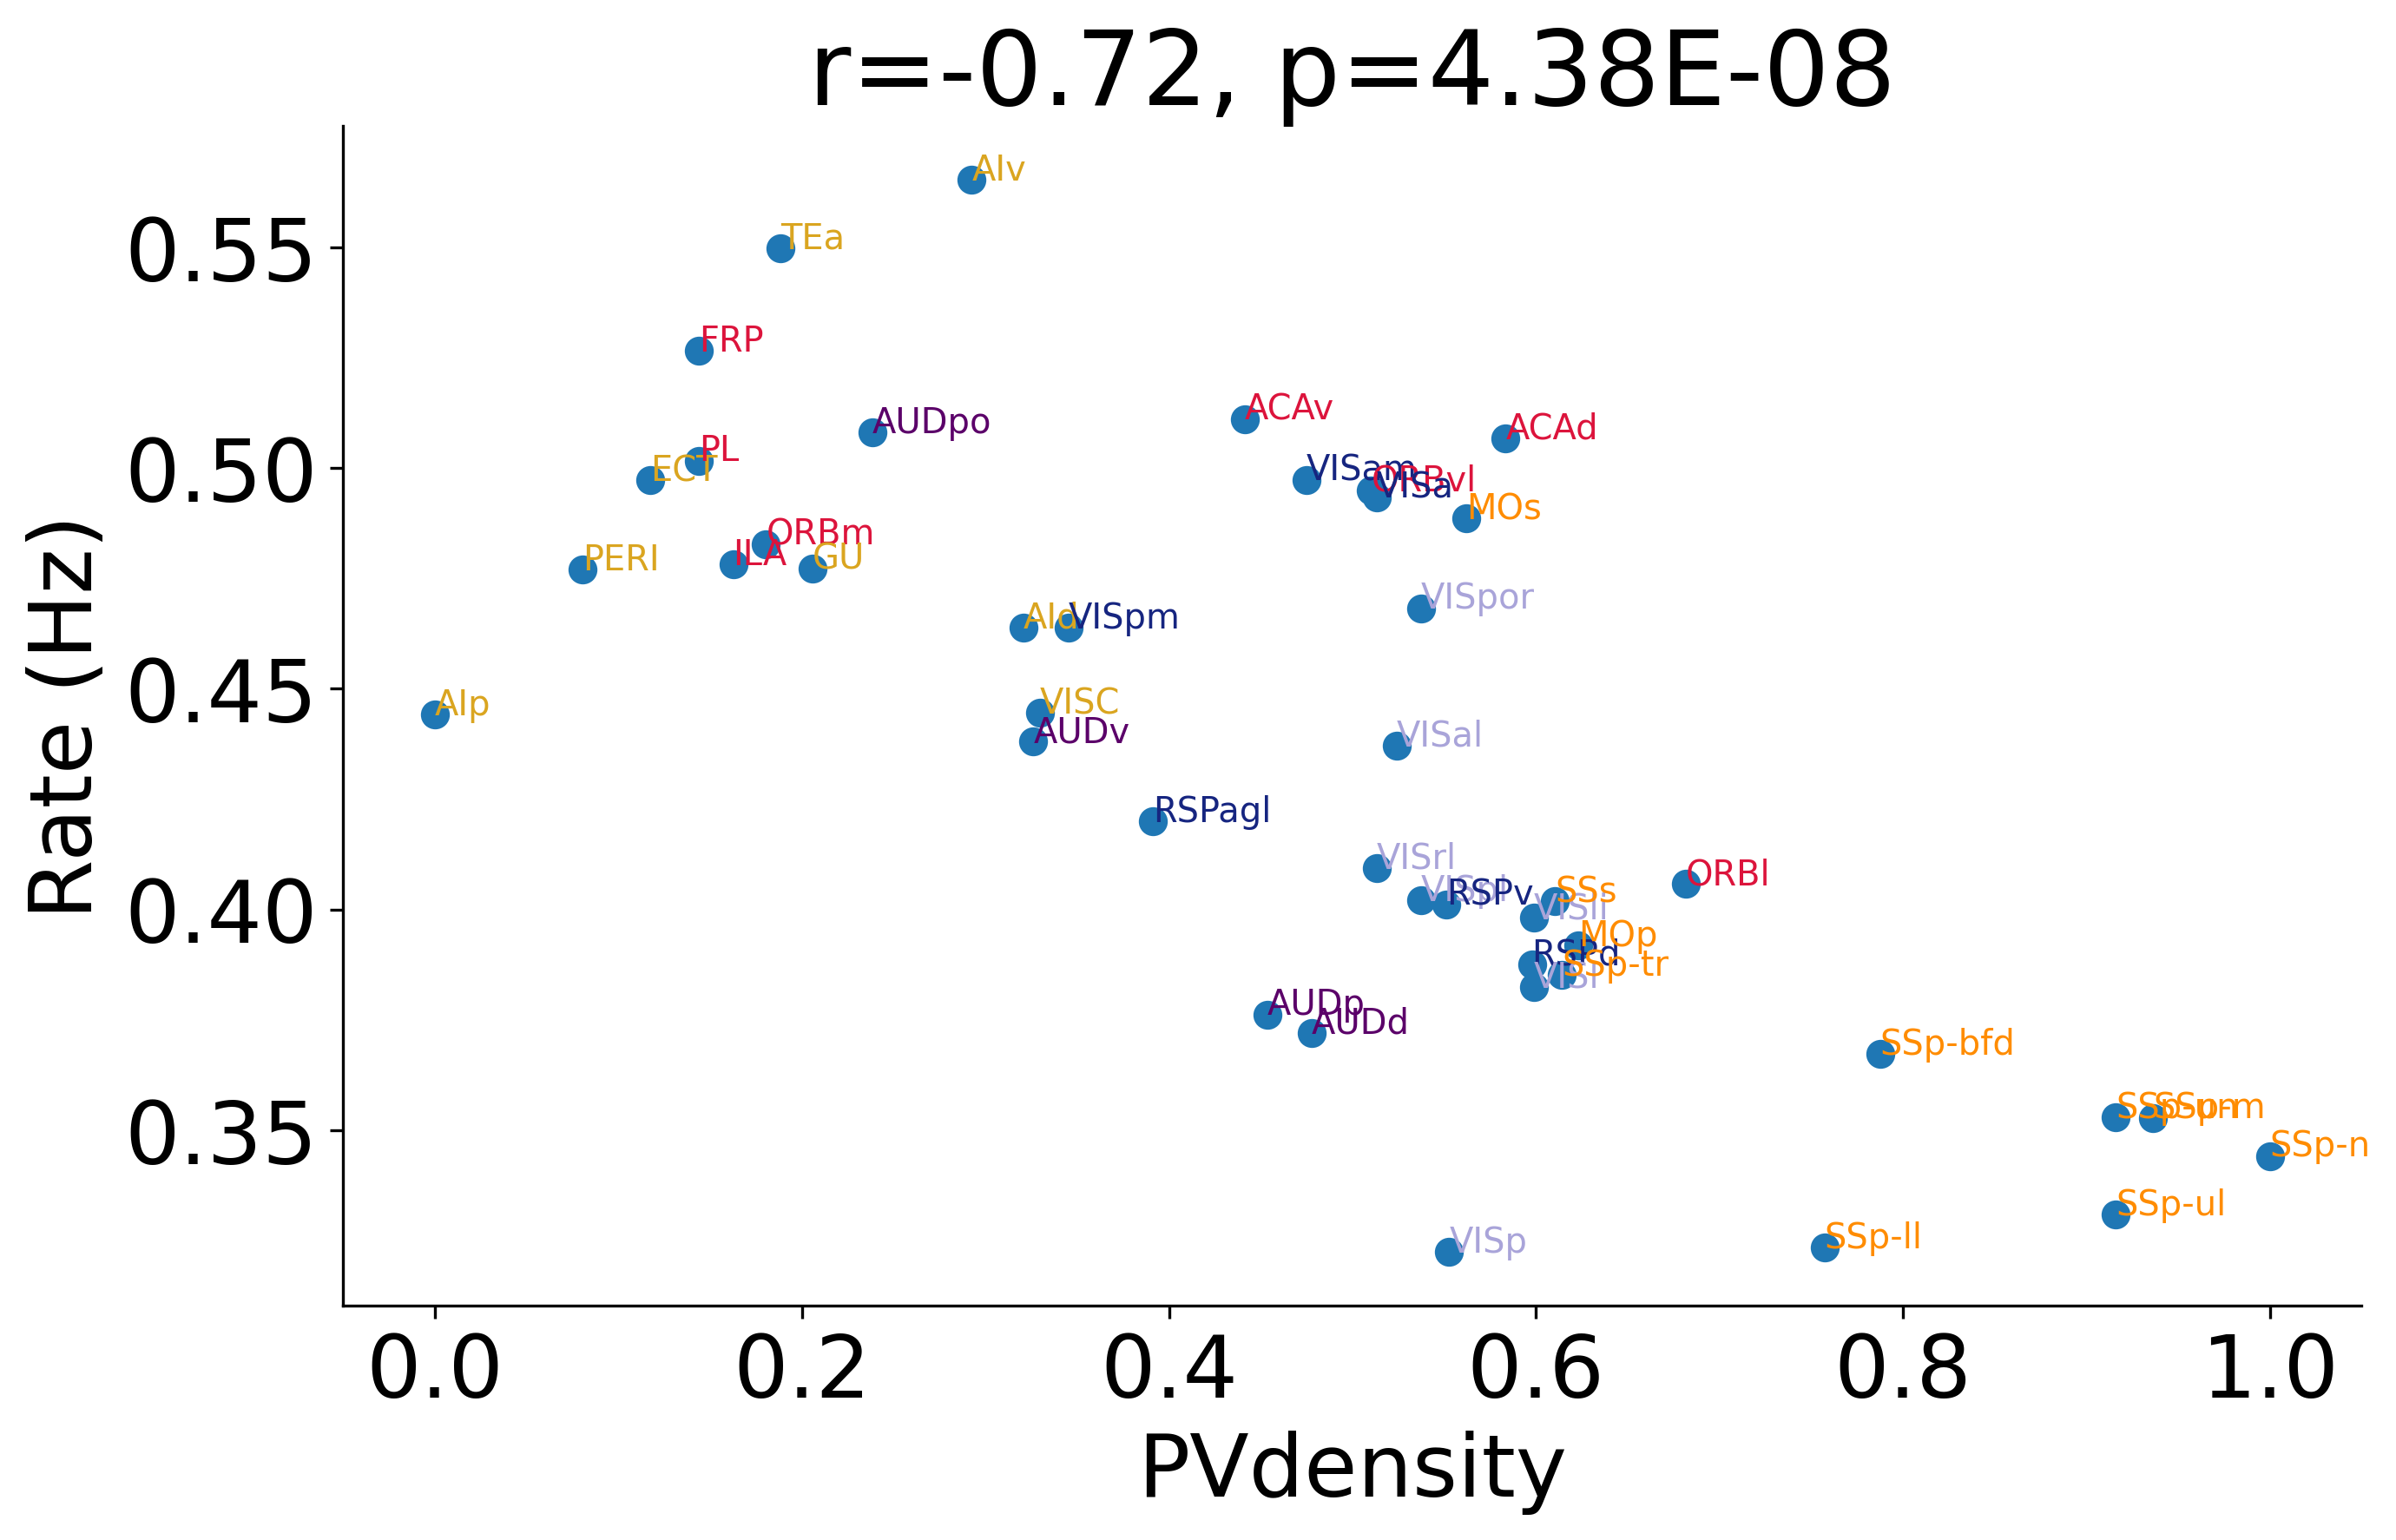

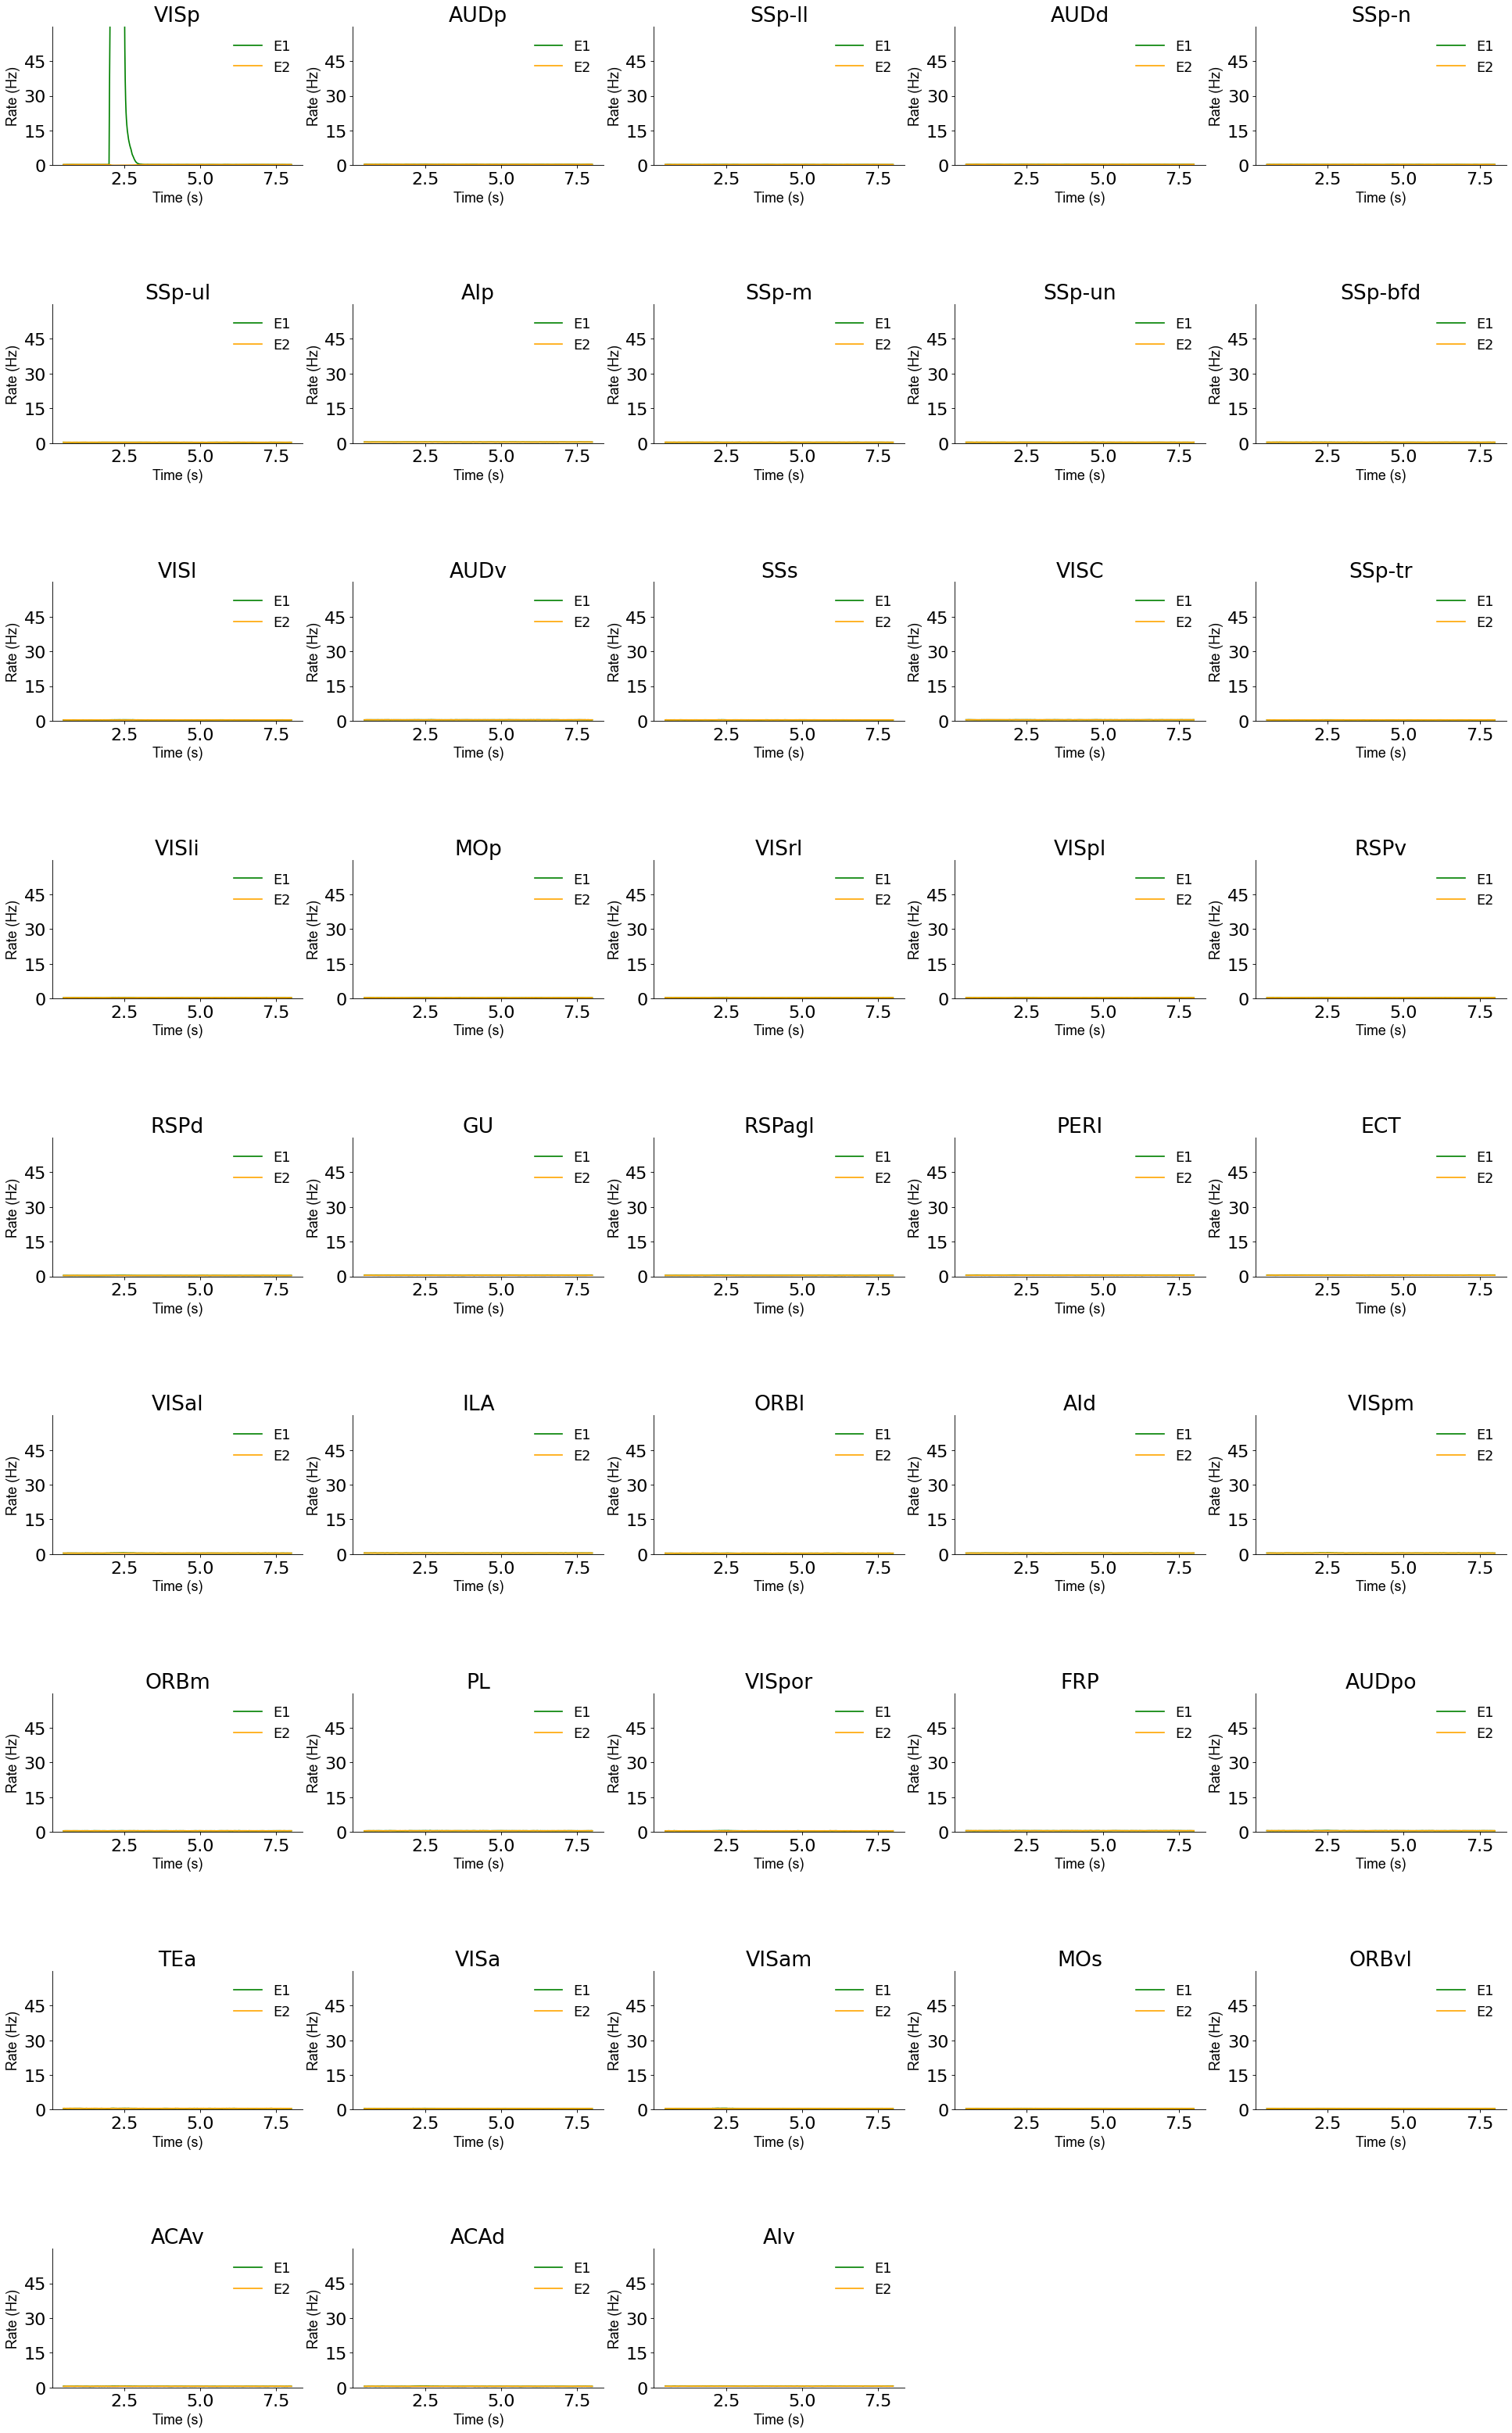

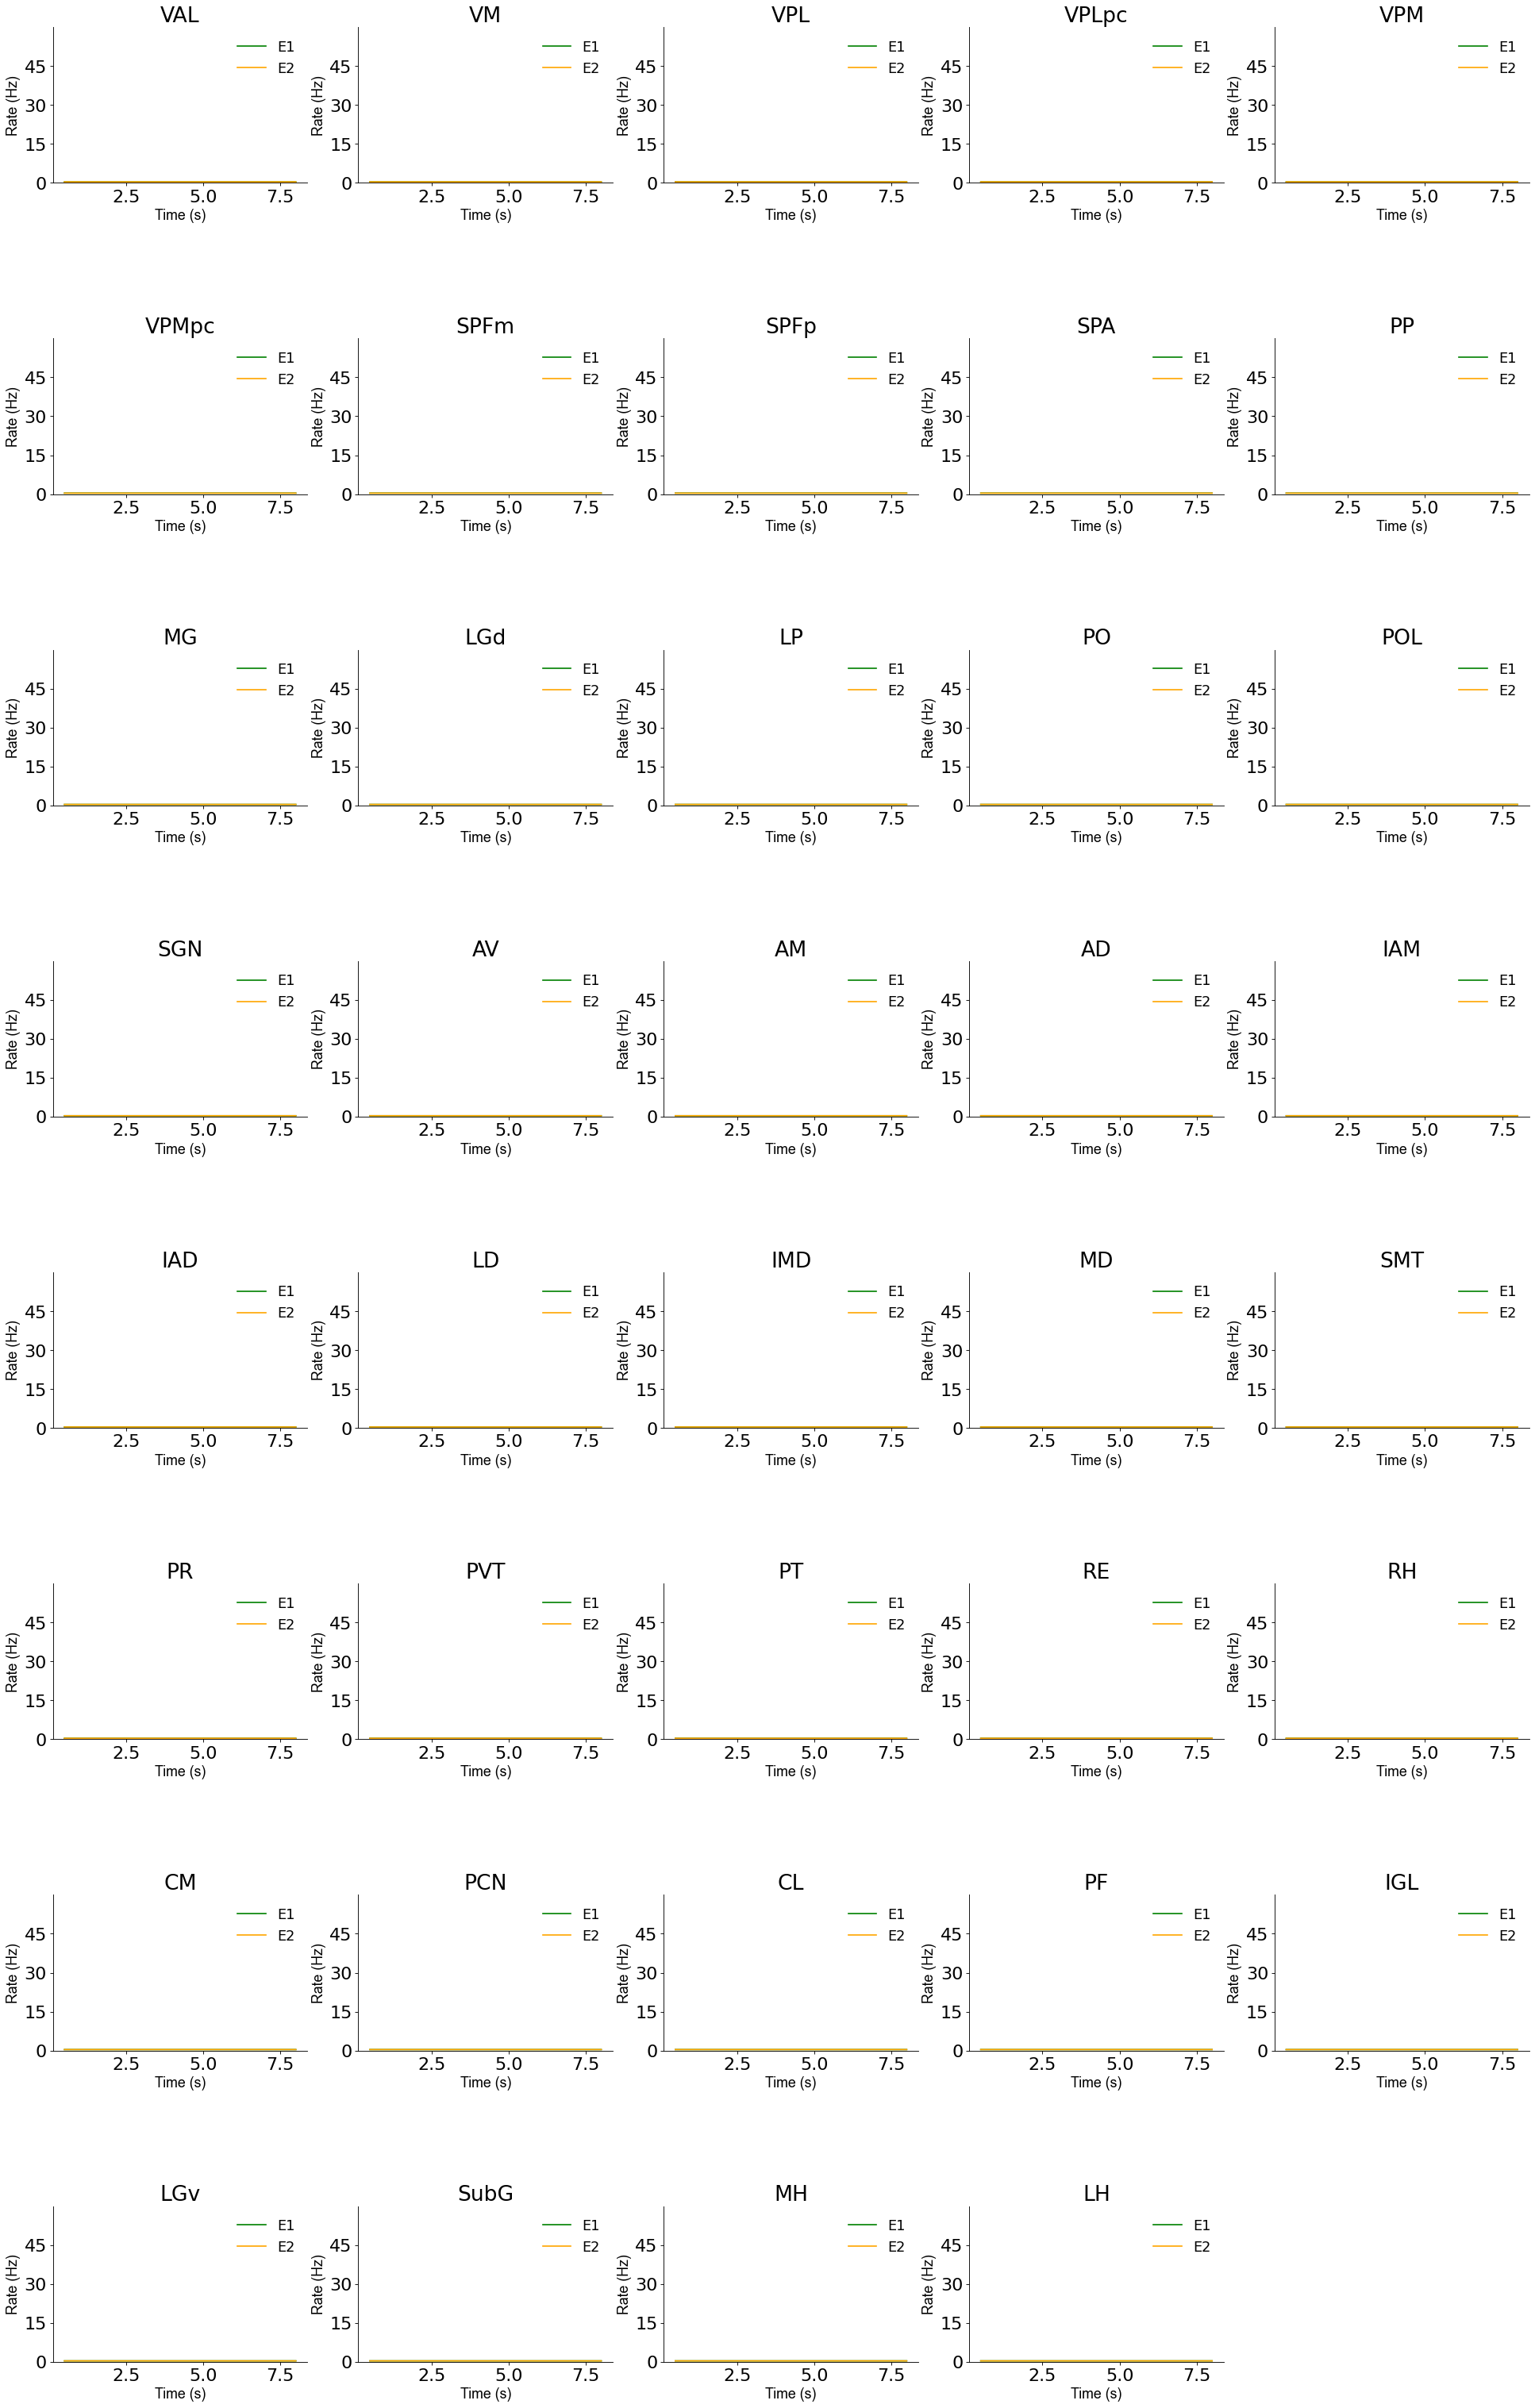

In [7]:
savefigflag = False
[persistentactlist,baselineactlist,LRtoElist,LRtoIlist] = model_V1_thal_noThal.save_delay_activity('tempdata/',False)
# generate firing rate distribution
preparatory_threshold = 10
PAthreshold = 5 #Hz
th_PAthreshold = 5 #Hz
persistentact_df =  model_V1_thal_noThal.generatePAdf(PAthreshold)
if model_V1_thal_noThal.thcxmodel == True:
    th_persistentact_df = model_V1_thal_noThal.generate_th_PAdf(th_PAthreshold, thal_hierarchy)

model_V1_thal_noThal.plotFRvsHier(False, True, 2, (10,6), 24, False, 'FRvsHier.pdf')
model_V1_thal_noThal.plotFRvsPV(False, True, 2, (10,6), 24, False, 'FRvsPV.pdf')
model_V1_thal_noThal.plotFRallarea(plot_interneuron = False, ylimit = 60, savefig = savefigflag, figfilename = 'FRallcortex.pdf')
if model_V1_thal_noThal.thcxmodel == True:
    model_V1_thal_noThal.plotFRthalarea(savefig = savefigflag, ylimit = 60, figfilename = 'FRallthalamus.pdf')
#     model_V1.plot_th_FRvshier(annotation_adjust = False)


In [8]:
with open('results/model_V1_thal_noThal.pkl', 'wb') as f:
    pickle.dump(model_V1_thal_noThal, f)

In [9]:
with open('results/allparsThal.pkl', 'rb') as f:
    [parameters, conn_cxcx, pref_matrix,
         hierarchy_df, normPVgrad_df, normSSTgrad_df,
         area_list, conn_thcx, conn_cxth, thal_list] = pickle.load(f)

######
parameters['inh_stim_on'] = parameters['stim_on'] + parameters['stim_off']
parameters['inh_stim_off'] = parameters['trial_length']
parameters['inhibitoryInput'] = True

thcxmodel = True
model_V1_thal_inhibitThal = model(parameters, False, conn_cxcx, pref_matrix, hierarchy_df, normPVgrad_df, normSSTgrad_df, area_list, thcxmodel, conn_thcx, conn_cxth, thal_list)    
if thcxmodel:
    model_V1_thal_inhibitThal.add_input(parameters['stim_strength'], ['VISp'], parameters['stim_on'], parameters['stim_off'], 'E1')
    model_V1_thal_inhibitThal.add_input_TH(-10*parameters['stim_strength'], thal_list, parameters['inh_stim_on'], parameters['inh_stim_off'], 'both')
#     model_V1.add_input(10*parameters['stim_strength'],['MOs'], parameters['stim_on'] + parameters['stim_off'], parameters['trial_length'], 'I') 

model_V1_thal_inhibitThal.run_sim(vocal_prompt = False)
[persistentactlist, baselineactlist, LRtoElist, LRtoIlist] = model_V1_thal_inhibitThal.save_delay_activity('tempdata/', False)
if model_V1_thal_inhibitThal.thcxmodel == True:
    th_persistentactlist = model_V1_thal_inhibitThal.save_th_delay_activity('tempdata/',False)
    

VISp
VAL
VM
VPL
VPLpc
VPM
VPMpc
SPFm
SPFp
SPA
PP
MG
LGd
LP
PO
POL
SGN
AV
AM
AD
IAM
IAD
LD
IMD
MD
SMT
PR
PVT
PT
RE
RH
CM
PCN
CL
PF
IGL
LGv
SubG
MH
LH
simulation start: 
sim done.


2.25E-09
5.44E-13


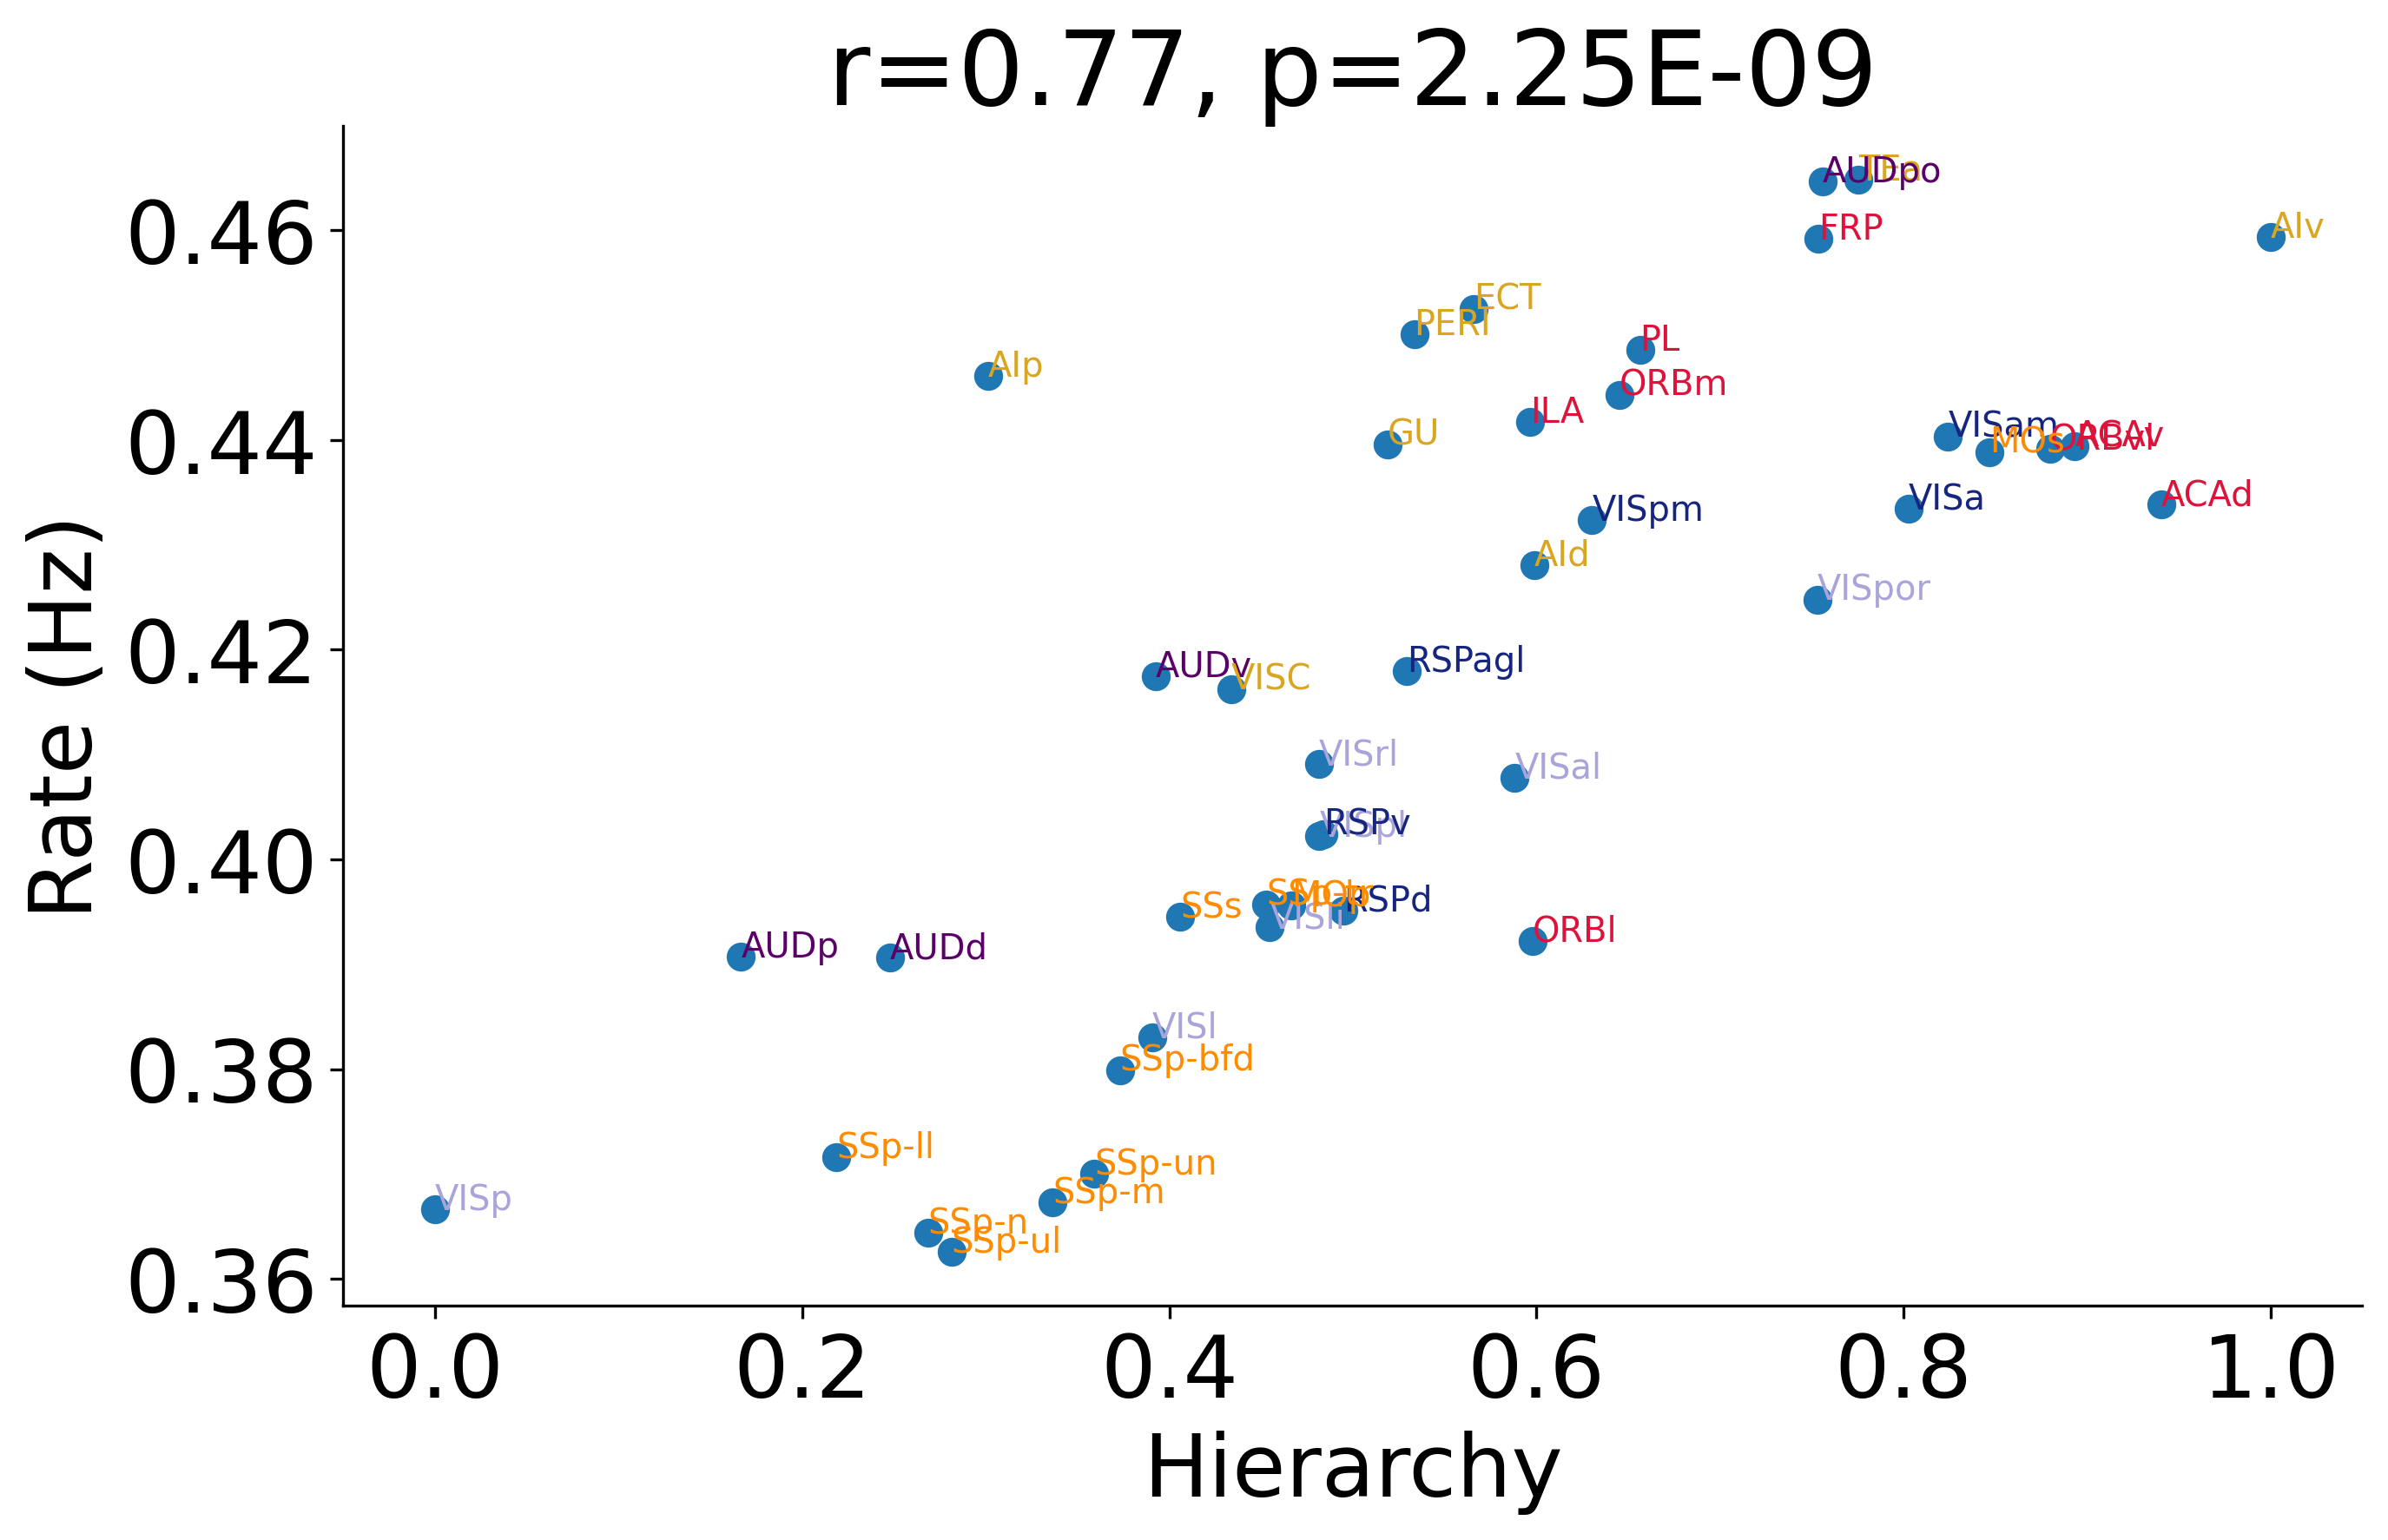

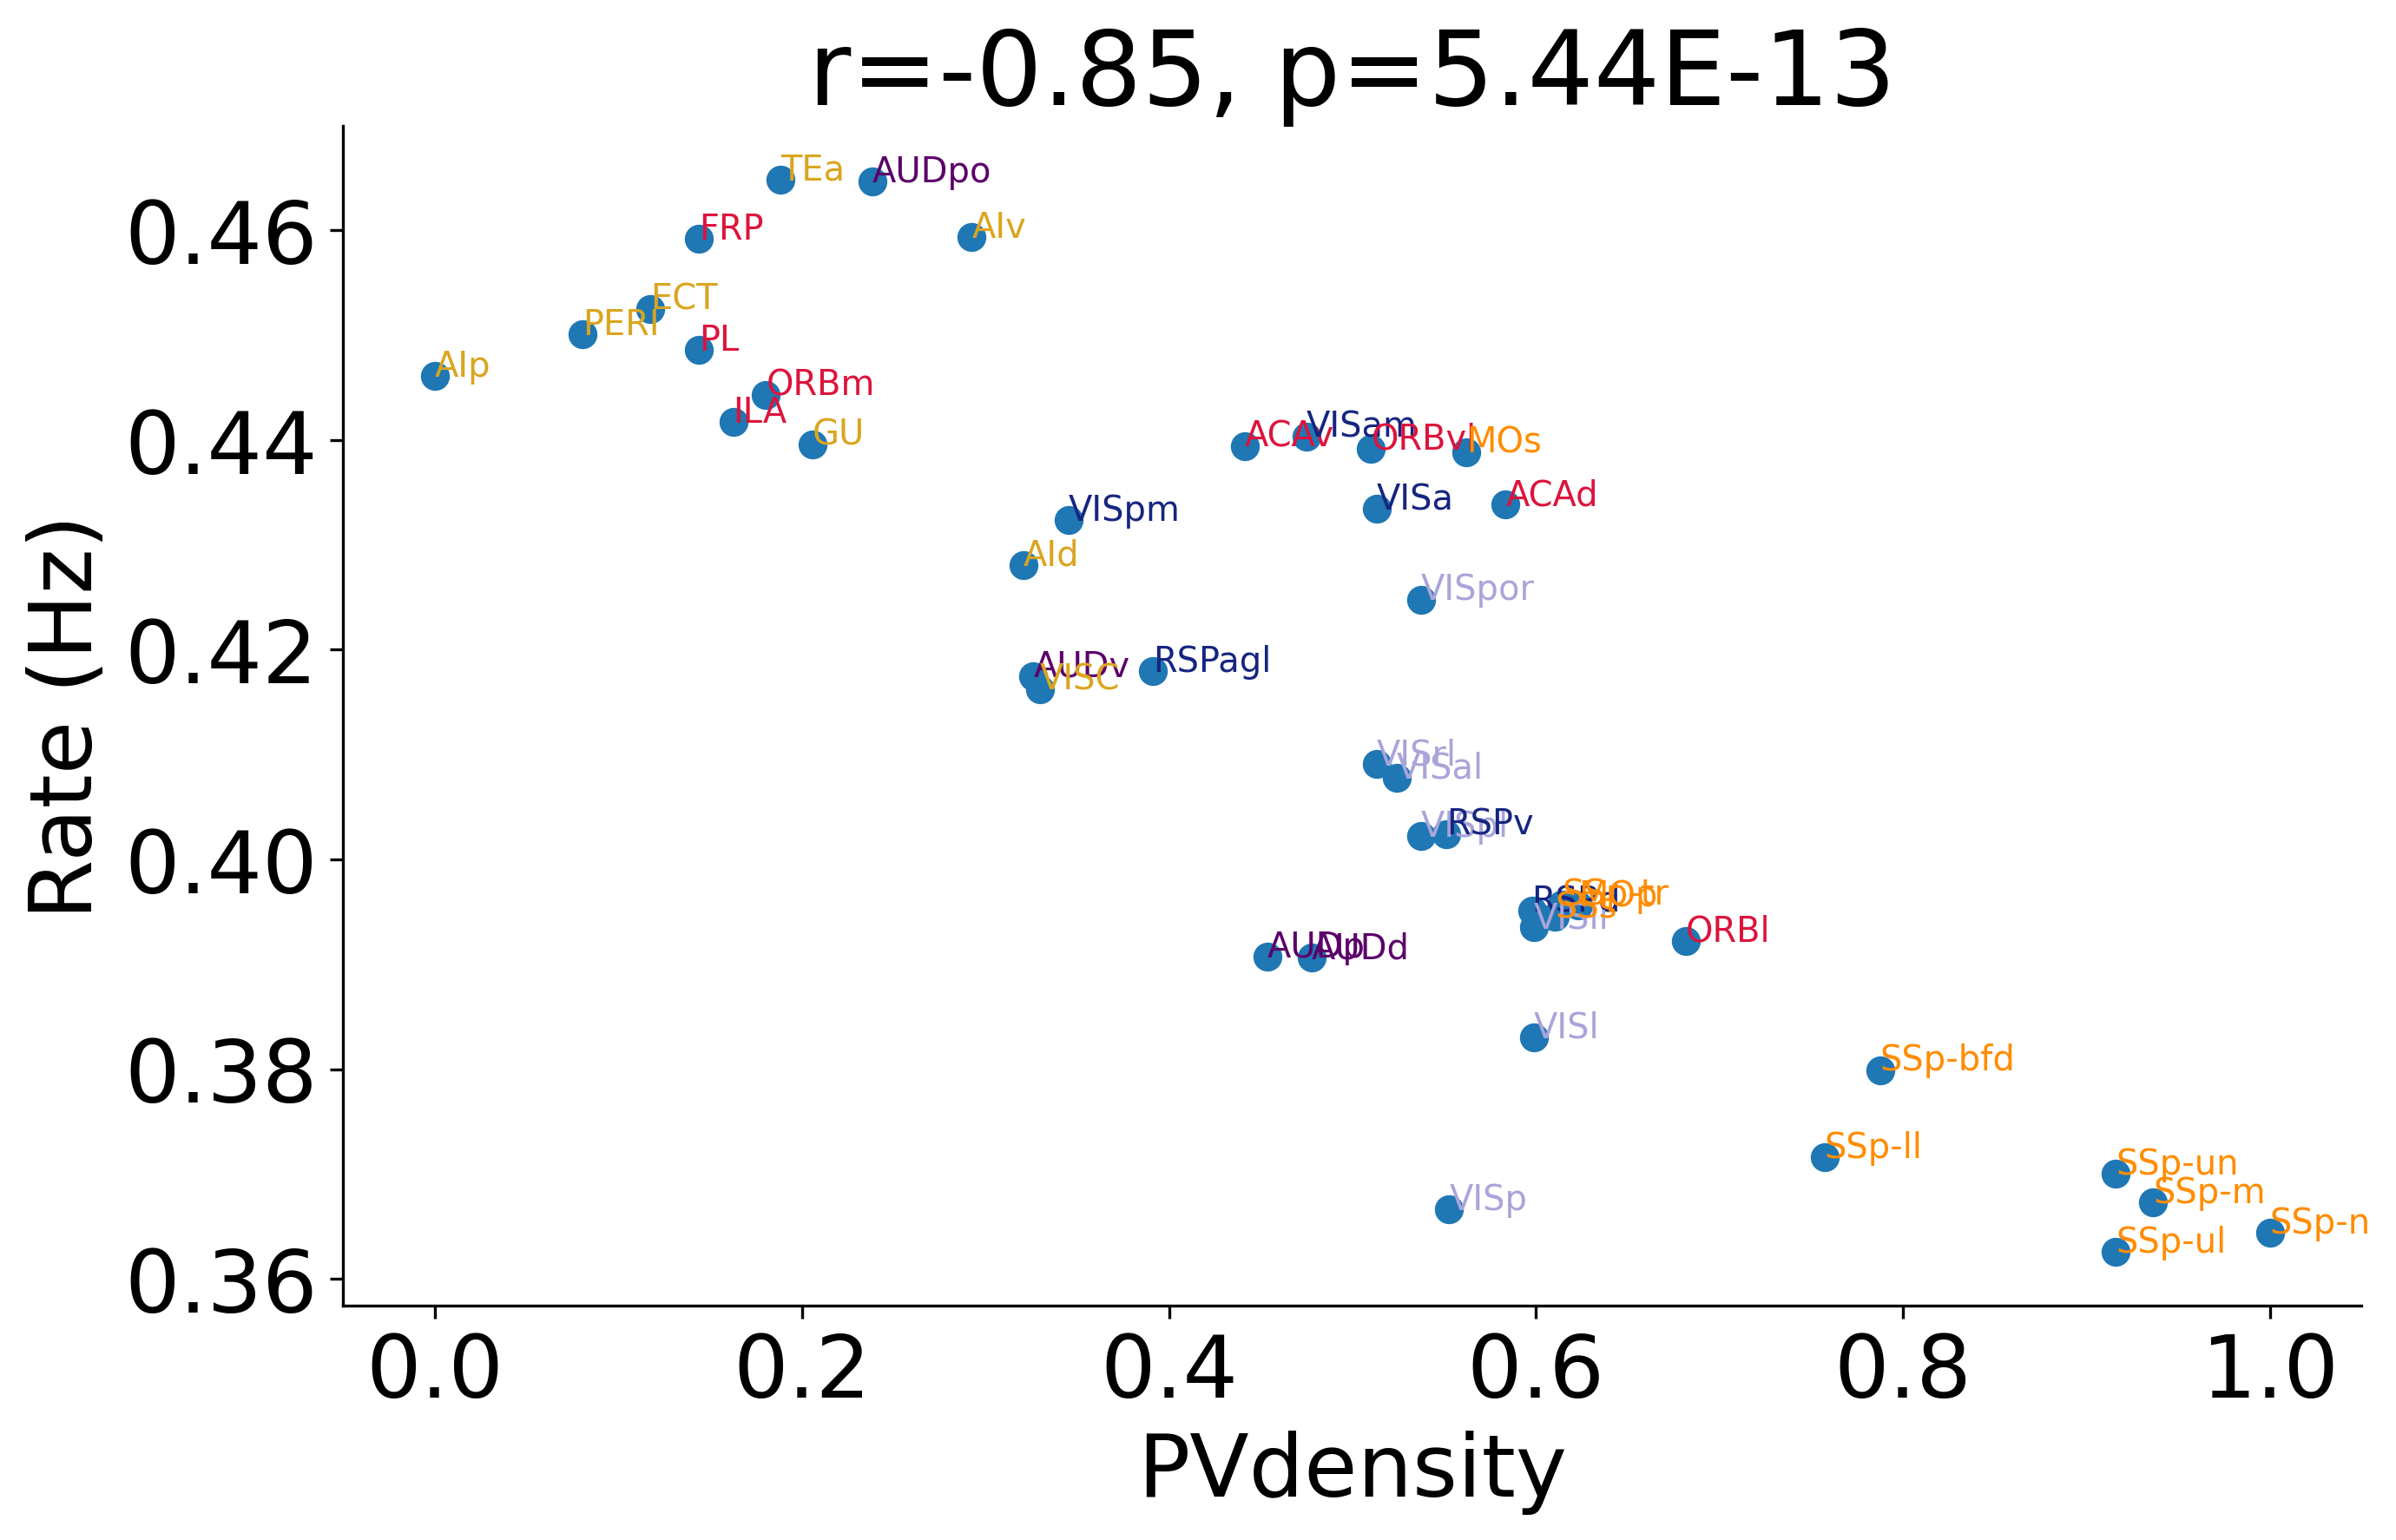

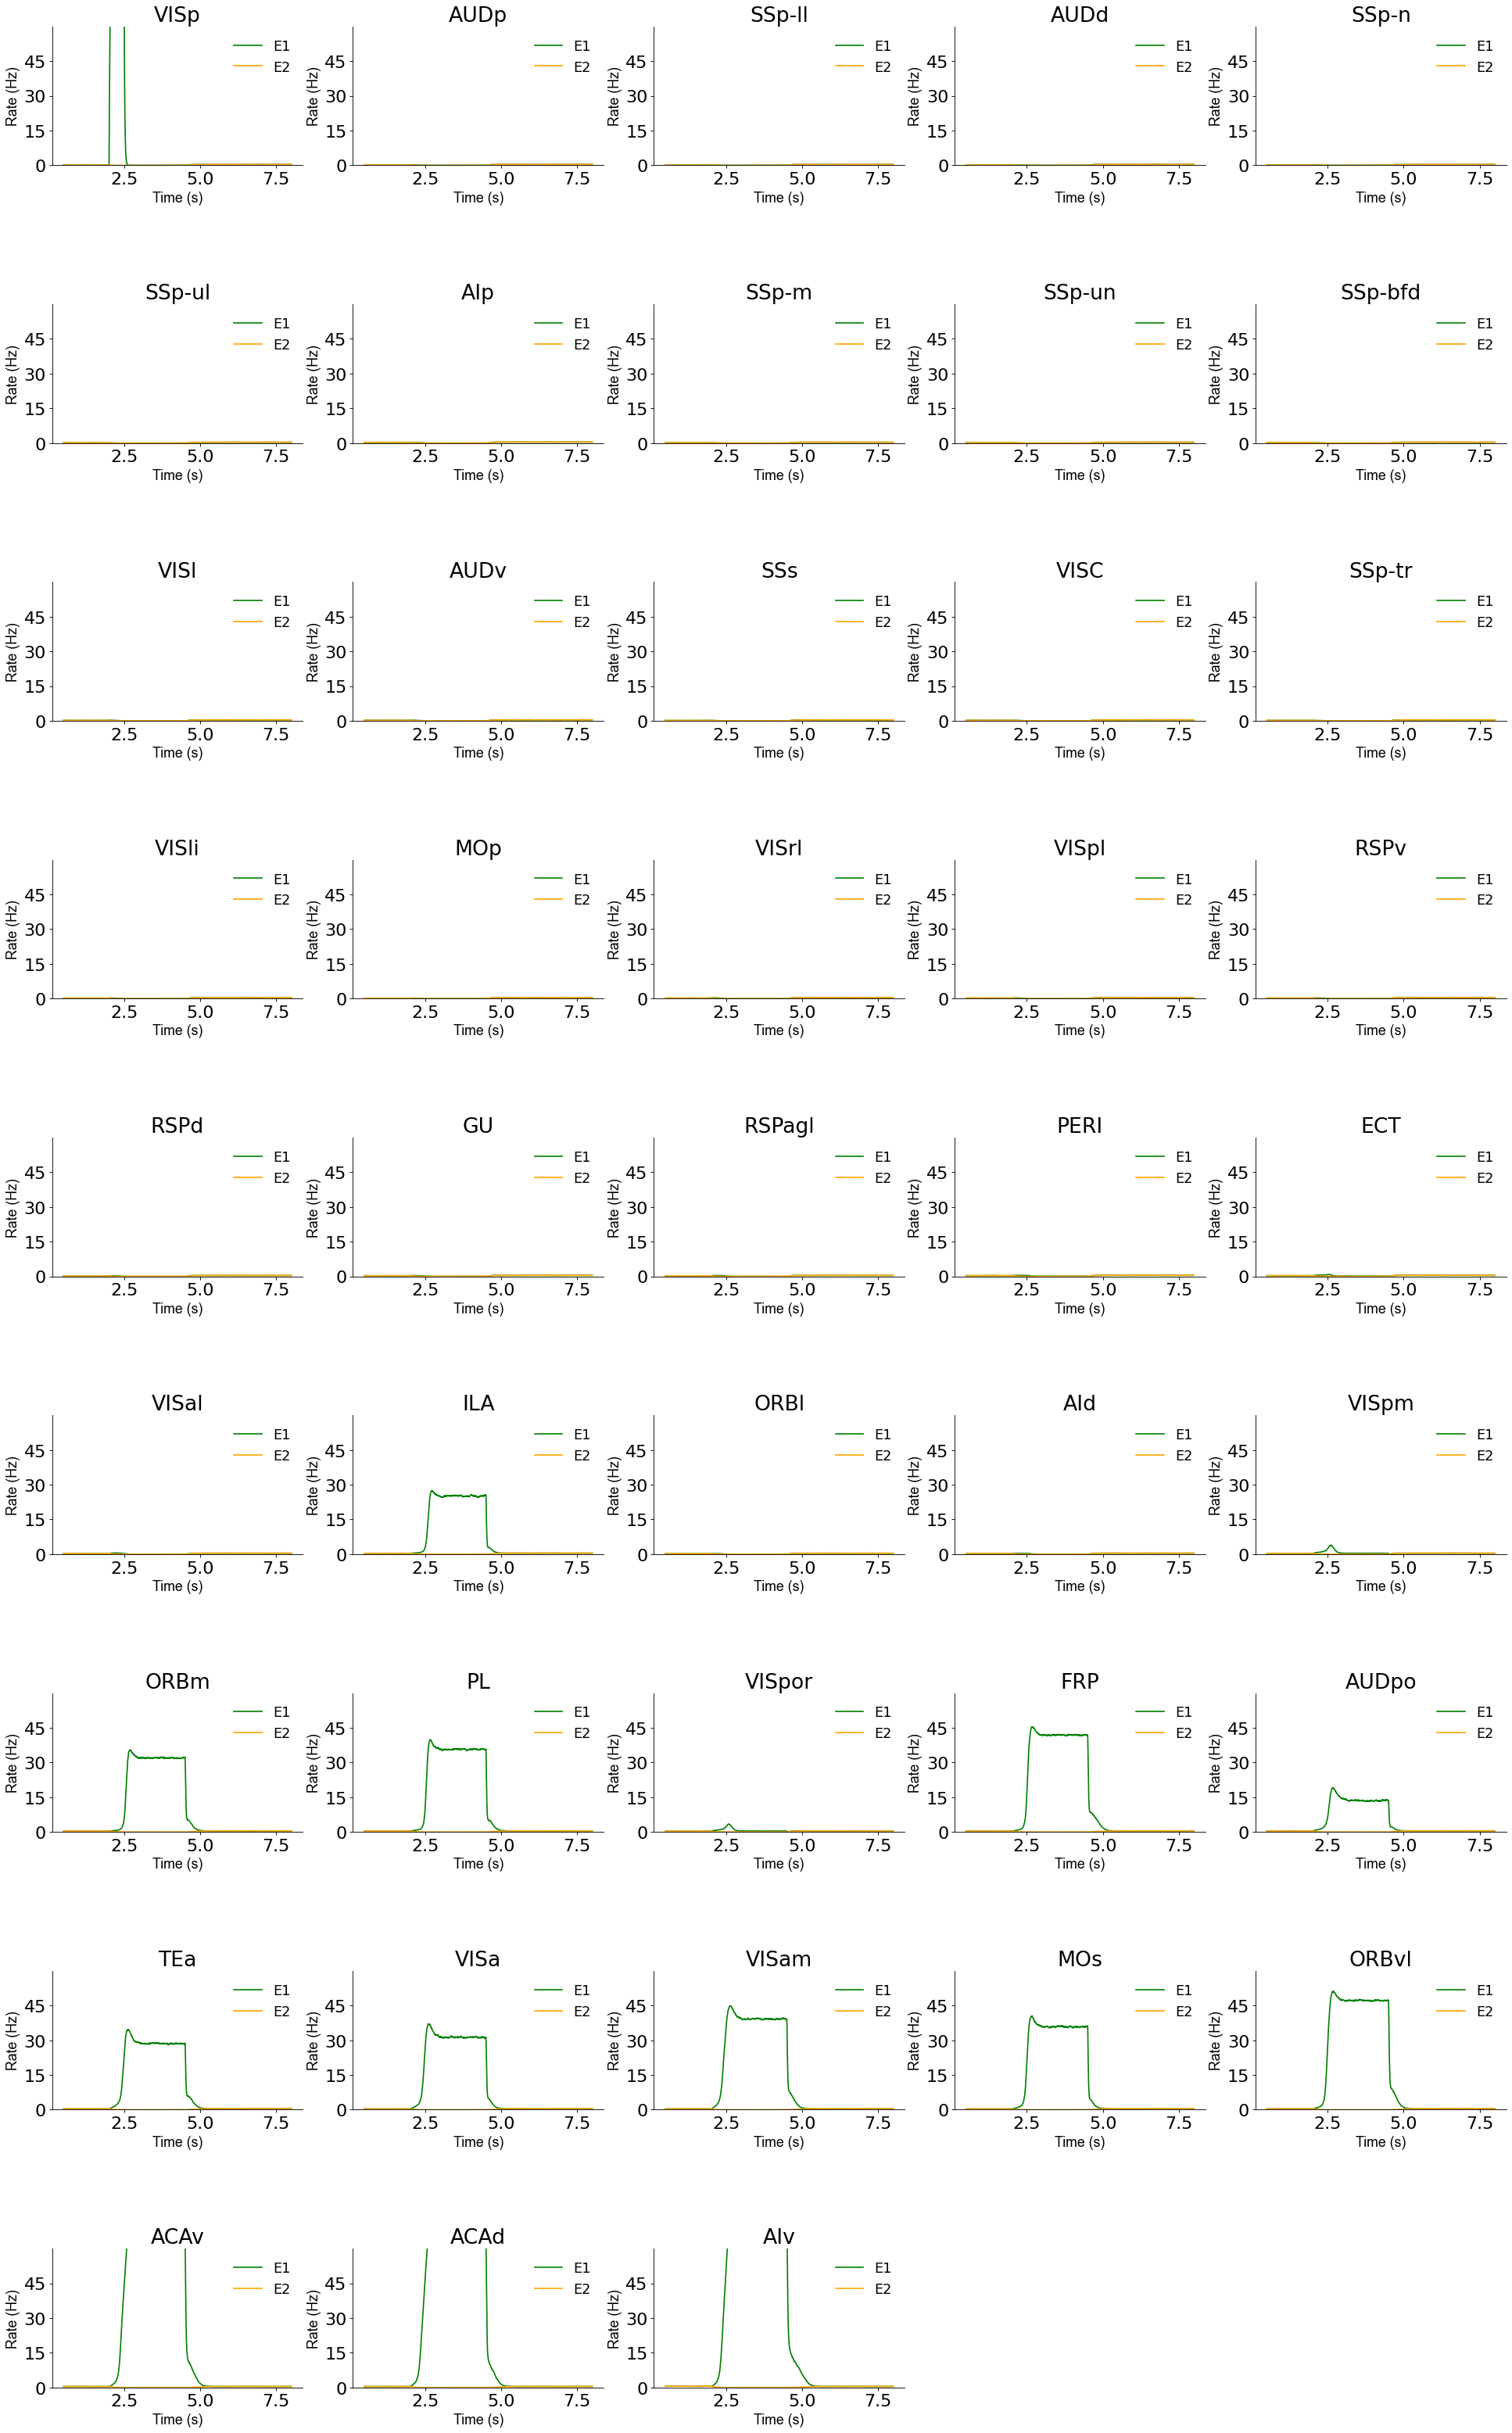

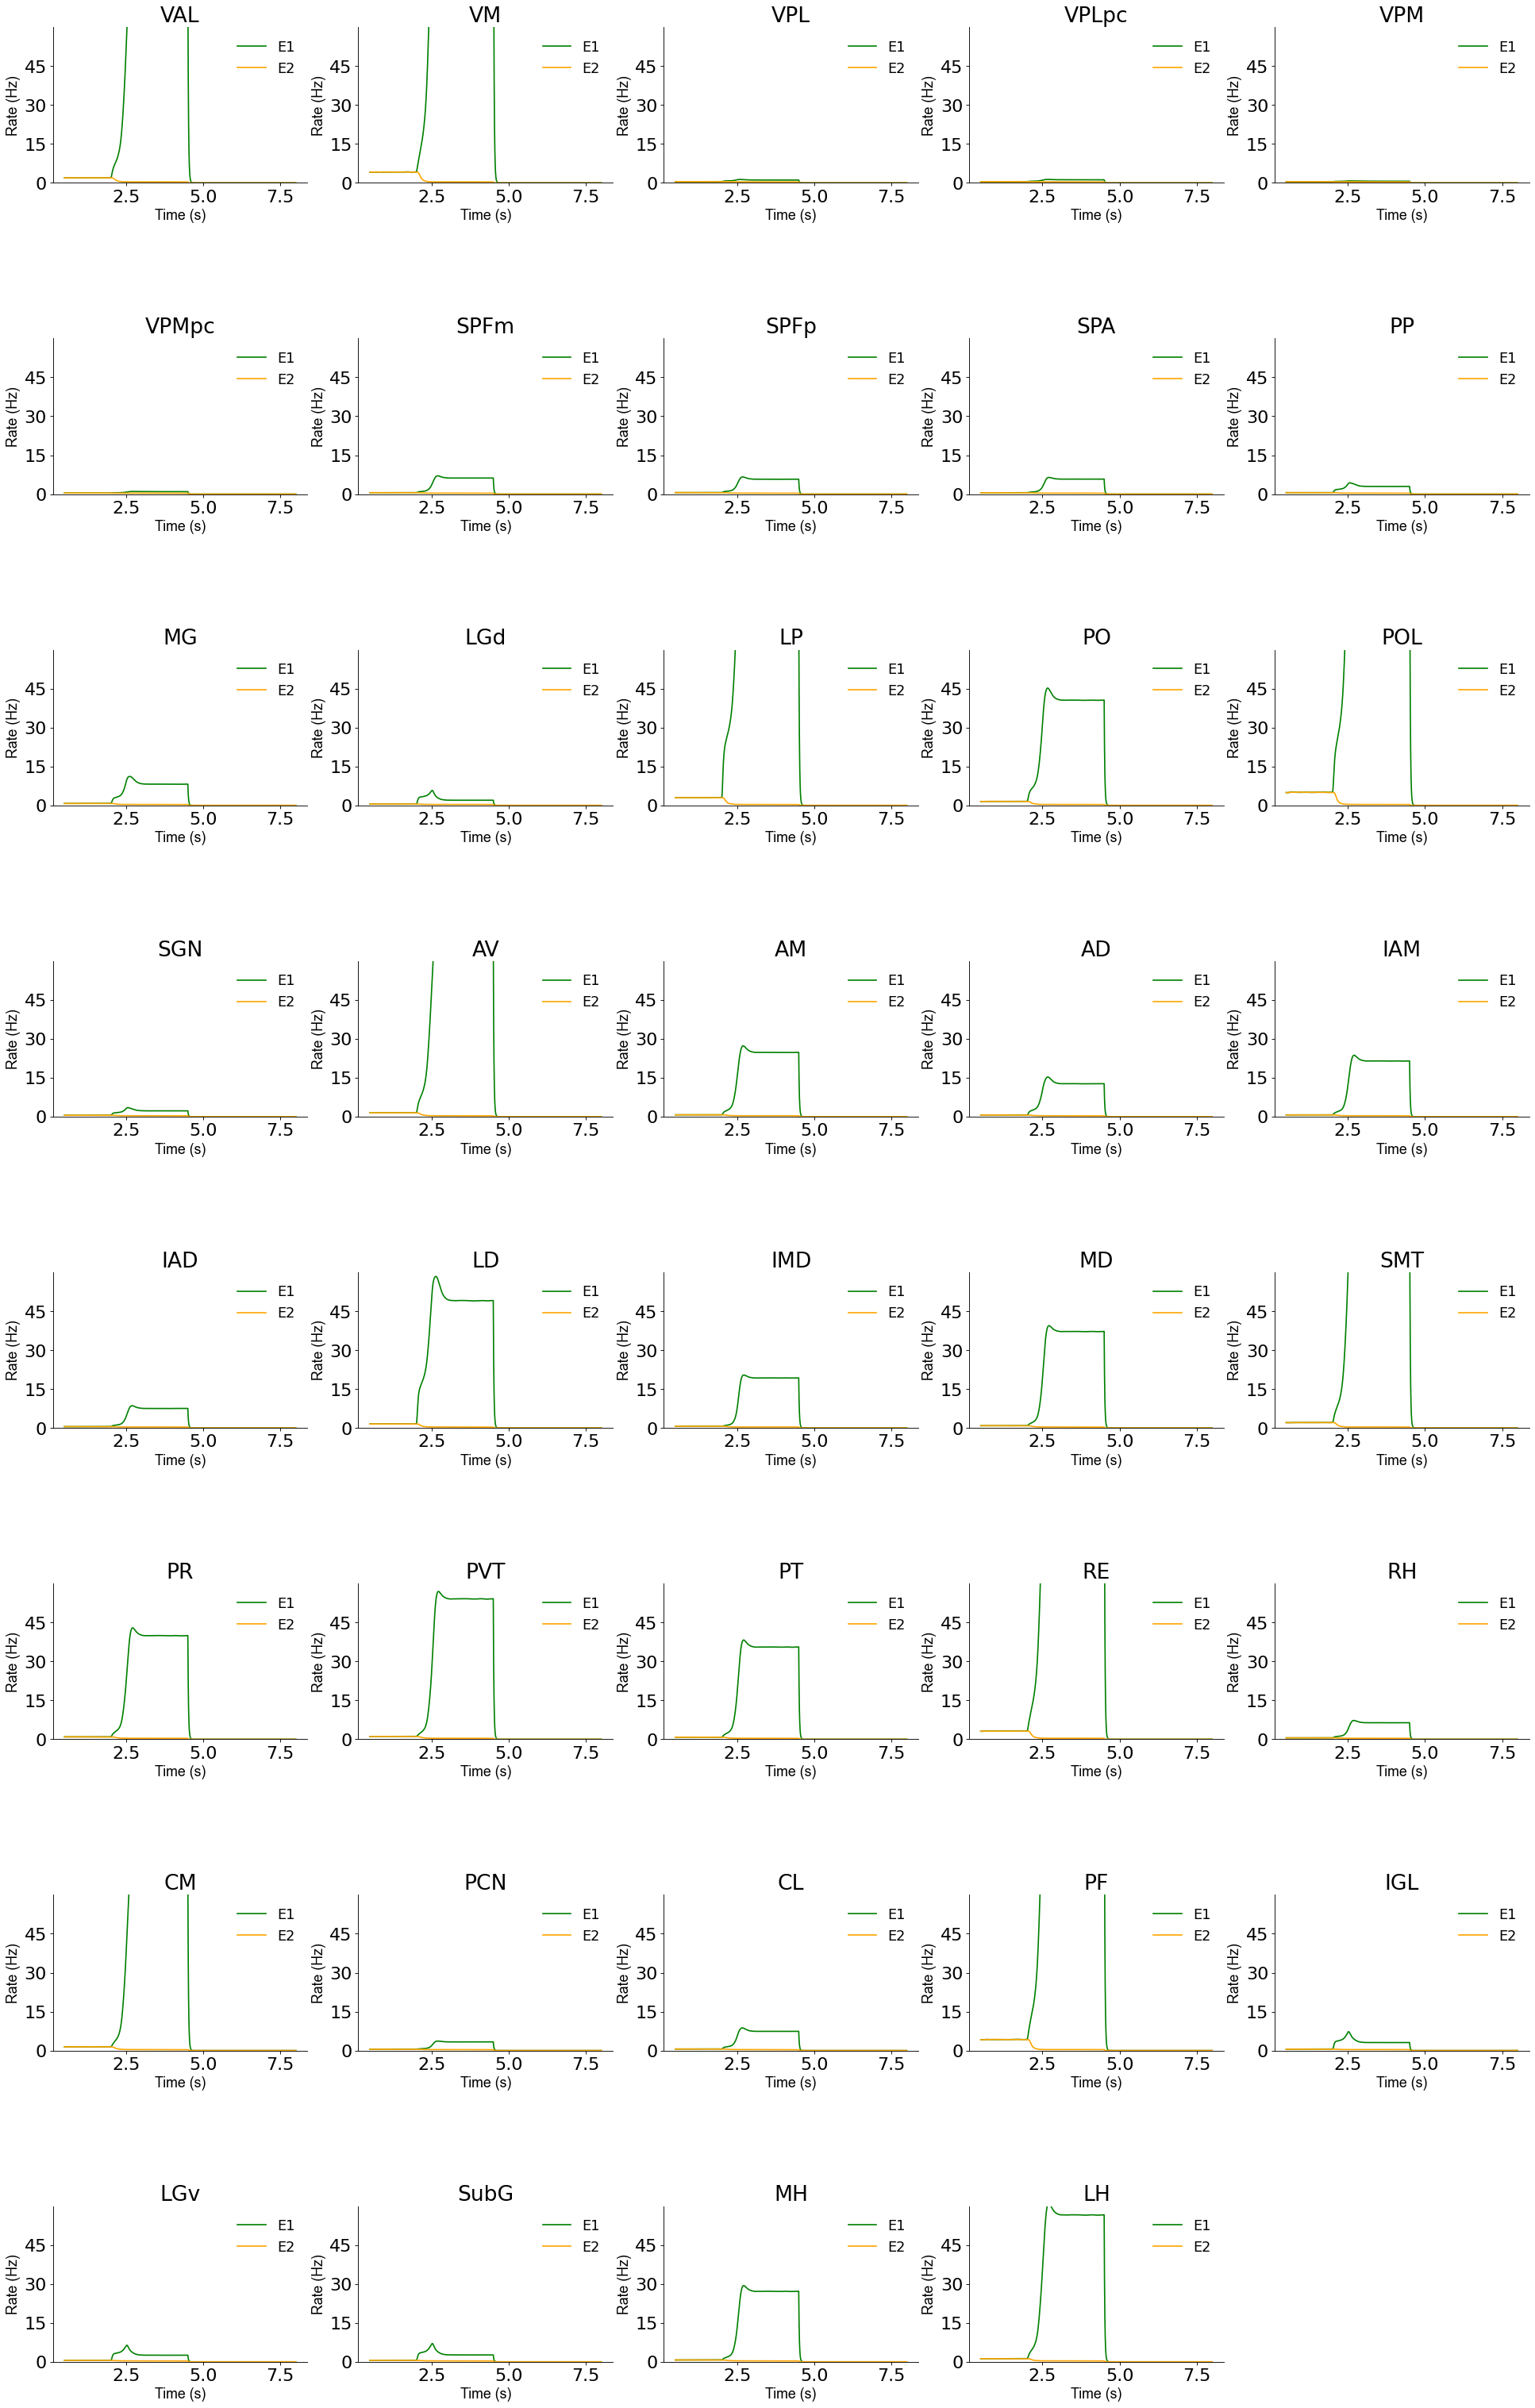

In [10]:
savefigflag = False
# generate firing rate distribution
preparatory_threshold = 10
PAthreshold = 5 #Hz
th_PAthreshold = 5 #Hz
persistentact_df =  model_V1_thal_inhibitThal.generatePAdf(PAthreshold)
if model_V1_thal_inhibitThal.thcxmodel == True:
    th_persistentact_df = model_V1_thal_inhibitThal.generate_th_PAdf(th_PAthreshold, thal_hierarchy)

model_V1_thal_inhibitThal.plotFRvsHier(False, True, 2, (10,6), 24, False, 'FRvsHier.pdf')
model_V1_thal_inhibitThal.plotFRvsPV(False, True, 2, (10,6), 24, False, 'FRvsPV.pdf')
model_V1_thal_inhibitThal.plotFRallarea(plot_interneuron = False, ylimit = 60, savefig = savefigflag, figfilename = 'FRallcortex.pdf')
if model_V1_thal_inhibitThal.thcxmodel == True:
    model_V1_thal_inhibitThal.plotFRthalarea(savefig = savefigflag, ylimit = 60, figfilename = 'FRallthalamus.pdf')
#     model_V1.plot_th_FRvshier(annotation_adjust = False)

In [11]:
with open('results/model_V1_thal_inhibitThal.pkl', 'wb') as f:
    pickle.dump(model_V1_thal_inhibitThal, f)